### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
df = pd.read_excel("Advertising.xlsx",index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 4)

### Performing the Feature selection techniques

In [4]:
correlation = df.corr()
correlation

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


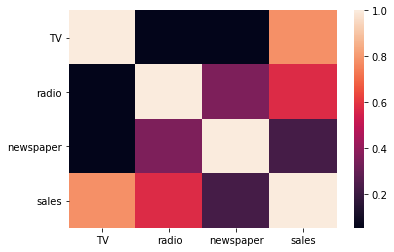

In [6]:
## pLotting the correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(correlation)
plt.show()

In [7]:
## Applying linear regression on whole dataset
X = df.drop('sales',axis=1)
y = df['sales']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [11]:
## For evaluating the model performance we are importing the mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [12]:
lr.fit(X_train,y_train)
sqrt(mean_squared_error(y_test,lr.predict(X_test)))

2.0981225634956795

Here we got root mean square error = 2.0981225634956795

In [14]:
### Performing the feature reduction

In [15]:
### p value evaluation for checking the correlation of dependent and independent variables

In [16]:
import statsmodels.formula.api as snf

In [17]:
lrs = snf.ols(formula = 'sales ~ TV+radio+newspaper',data=df).fit()

In [18]:
lrs.conf_int()

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
radio,0.171547,0.205513
newspaper,-0.012616,0.010541


In [19]:
lrs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           1.58e-96
Time:                        03:18:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
lrs.rsquared

0.8972106381789522

In [21]:
lrs.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64

So we are removing the newspaper column and again checking for coefficients, intercept and r-squared value

In [22]:
lrs1 = snf.ols(formula='sales ~ TV+radio',data=df).fit()

In [23]:
lrs1.conf_int()

,0,1
Intercept,2.340343,3.501857
TV,0.043013,0.048497
radio,0.172139,0.203850


In [24]:
lrs1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           4.83e-98
Time:                        03:22:51   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
lrs1.rsquared

0.8971942610828957

In [27]:
lrs1.pvalues

Intercept    4.565557e-19
TV           5.436980e-82
radio        9.776972e-59
dtype: float64

In [28]:
## Testing for model performance
lr1 = LinearRegression()

In [29]:
X = df.drop(['sales','newspaper'],axis=1)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
X_train.shape

(160, 2)

In [32]:
lr1.fit(X_train,y_train)
sqrt(mean_squared_error(y_test,lr1.predict(X_test)))

2.0955738506628383